In [18]:
from bs4 import BeautifulSoup
import requests

In [19]:
url = 'https://results.eci.gov.in/PcResultGenJune2024/index.htm'
page = requests.get(url)
soup = BeautifulSoup(page.text,'html.parser')

In [20]:
print(soup)

<!DOCTYPE html>

<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=7" http-equiv="X-UA-Compatible"/>
<meta content="no-cache, no-store, must-revalidate" http-equiv="Cache-Control"/>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="0" http-equiv="Expires"/>
<meta content="300" http-equiv="refresh"/>
<!-- Bootstrap CSS -->
<link href="css/bootstrap.min.css" rel="stylesheet"/>
<link href="css/custom.css" rel="stylesheet"/>
<link href="css/responsive.css" rel="stylesheet"/>
<link href="css/font.css" rel="stylesheet"/>
<link href="img/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<title>Election Commission of India</title>
<style type="text/css">
</style>
<script>!function(a){var e="https://s.go-mpulse.net/boomerang/",t="addEventListener";if("False"=="True")a.BOOMR_config=a.BOOMR_con

In [21]:
header_div = soup.find('header', class_='header')
if header_div:
    logo_img = header_div.find('div', class_='logo').a.img['src'] if header_div.find('div', class_='logo').a.img else "No Logo Found"
    home_link = header_div.find('a', href='index.htm').text.strip() if header_div.find('a', href='index.htm') else "No Home Link Found"
    hindi_link = header_div.find('a', href='hi/index.htm').text.strip() if header_div.find('a', href='hi/index.htm') else "No Hindi Link Found"
    refresh_link = header_div.find('a', onclick="window.location.href=window.location.href").text.strip() if header_div.find('a', onclick="window.location.href=window.location.href") else "No Refresh Link Found"

In [22]:
    print(f"Logo Image URL: {logo_img}")
    print(f"Home Link: {home_link}")
    print(f"Hindi Link: {hindi_link}")
    print(f"Refresh Link: {refresh_link}")

Logo Image URL: img/eci-logo.png
Home Link: 
Hindi Link: Hindi
Refresh Link: Refresh


In [23]:
disclaimer_div = soup.find('div', class_='dis-info')
if disclaimer_div:
    disclaimer_text = disclaimer_div.find('p', class_='mb-0').text.strip() if disclaimer_div.find('p', class_='mb-0') else "No Disclaimer Found"
    print(f"Disclaimer: {disclaimer_text}")

Disclaimer: ECI is displaying the information as being filled in the system by the Returning Officers from their respective Counting Centres.The final data for each AC/PC will be shared in Form-20.


In [24]:
party_results_table = soup.find('table', class_='table')
if party_results_table:
    headers = party_results_table.find_all('th')
    rows = party_results_table.find_all('tr')[1:-1]

In [25]:
header_names = [header.text.strip() for header in headers]
print('\t'.join(header_names))

Party	Won	Leading	Total	Total	543	0	543


In [26]:
for row in rows:
        row_data = [data.text.strip() for data in row.find_all('td')]
        print('\t'.join(row_data))

Bharatiya Janata Party - BJP	240	0	240
Indian National Congress - INC	99	0	99
Samajwadi Party - SP	37	0	37
All India Trinamool Congress - AITC	29	0	29
Dravida Munnetra Kazhagam - DMK	22	0	22
Telugu Desam - TDP	16	0	16
Janata Dal  (United) - JD(U)	12	0	12
Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT	9	0	9
Nationalist Congress Party – Sharadchandra Pawar - NCPSP	8	0	8
Shiv Sena - SHS	7	0	7
Lok Janshakti Party(Ram Vilas) - LJPRV	5	0	5
Yuvajana Sramika Rythu Congress Party - YSRCP	4	0	4
Rashtriya Janata Dal - RJD	4	0	4
Communist Party of India  (Marxist) - CPI(M)	4	0	4
Indian Union Muslim League - IUML	3	0	3
Aam Aadmi Party - AAAP	3	0	3
Jharkhand Mukti Morcha - JMM	3	0	3
Janasena Party - JnP	2	0	2
Communist Party of India  (Marxist-Leninist)  (Liberation) - CPI(ML)(L)	2	0	2
Janata Dal  (Secular) - JD(S)	2	0	2
Viduthalai Chiruthaigal Katchi - VCK	2	0	2
Communist Party of India - CPI	2	0	2
Rashtriya Lok Dal - RLD	2	0	2
Jammu & Kashmir National Conference - JKN	2	0	2
United People’s Party, 

In [106]:
import csv

# Example raw data (replace with your actual data)
raw_data = """
Bharatiya Janata Party - BJP\t240\t0\t240
Indian National Congress - INC\t99\t0\t99
Samajwadi Party - SP\t37\t0\t37
All India Trinamool Congress - AITC\t29\t0\t29
Dravida Munnetra Kazhagam - DMK\t22\t0\t22
Telugu Desam - TDP\t16\t0\t16
Janata Dal  (United) - JD(U)\t12\t0\t12
Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT\t9\t0\t9
Nationalist Congress Party – Sharadchandra Pawar - NCPSP\t8\t0\t8
Shiv Sena - SHS\t7\t0\t7
Lok Janshakti Party(Ram Vilas) - LJPRV\t5\t0\t5
Yuvajana Sramika Rythu Congress Party - YSRCP\t4\t0\t4
Rashtriya Janata Dal - RJD\t4\t0\t4
Communist Party of India  (Marxist) - CPI(M)\t4\t0\t4
Indian Union Muslim League - IUML\t3\t0\t3
Aam Aadmi Party - AAAP\t3\t0\t3
Jharkhand Mukti Morcha - JMM\t3\t0\t3
Janasena Party - JnP\t2\t0\t2
Communist Party of India  (Marxist-Leninist)  (Liberation) - CPI(ML)(L)\t2\t0\t2
Janata Dal  (Secular) - JD(S)\t2\t0\t2
Viduthalai Chiruthaigal Katchi - VCK\t2\t0\t2
Communist Party of India - CPI\t2\t0\t2
Rashtriya Lok Dal - RLD\t2\t0\t2
Jammu & Kashmir National Conference - JKN\t2\t0\t2
United People’s Party, Liberal - UPPL\t1\t0\t1
Asom Gana Parishad - AGP\t1\t0\t1
Hindustani Awam Morcha (Secular) - HAMS\t1\t0\t1
Kerala Congress - KEC\t1\t0\t1
Revolutionary Socialist Party - RSP\t1\t0\t1
Nationalist Congress Party - NCP\t1\t0\t1
Voice of the People Party - VOTPP\t1\t0\t1
Zoram People’s Movement - ZPM\t1\t0\t1
Shiromani Akali Dal - SAD\t1\t0\t1
Rashtriya Loktantrik Party - RLTP\t1\t0\t1
Bharat Adivasi Party - BHRTADVSIP\t1\t0\t1
Sikkim Krantikari Morcha - SKM\t1\t0\t1
Marumalarchi Dravida Munnetra Kazhagam - MDMK\t1\t0\t1
Aazad Samaj Party (Kanshi Ram) - ASPKR\t1\t0\t1
Apna Dal (Soneylal) - ADAL\t1\t0\t1
AJSU Party - AJSUP\t1\t0\t1
All India Majlis-E-Ittehadul Muslimeen - AIMIM\t1\t0\t1
Independent - IND\t7\t0\t7
"""

# Parse raw data into rows
rows = [row.strip().split('\t') for row in raw_data.strip().split('\n')]

# Specify the output CSV file name
csv_file = "output.csv"

# Write data to CSV file with UTF-8 encoding
with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    
    # Write rows to CSV file
    writer.writerows(rows)

print(f"CSV file '{csv_file}' has been successfully created with raw data.")


CSV file 'output.csv' has been successfully created with raw data.


In [27]:
import matplotlib.pyplot as plt

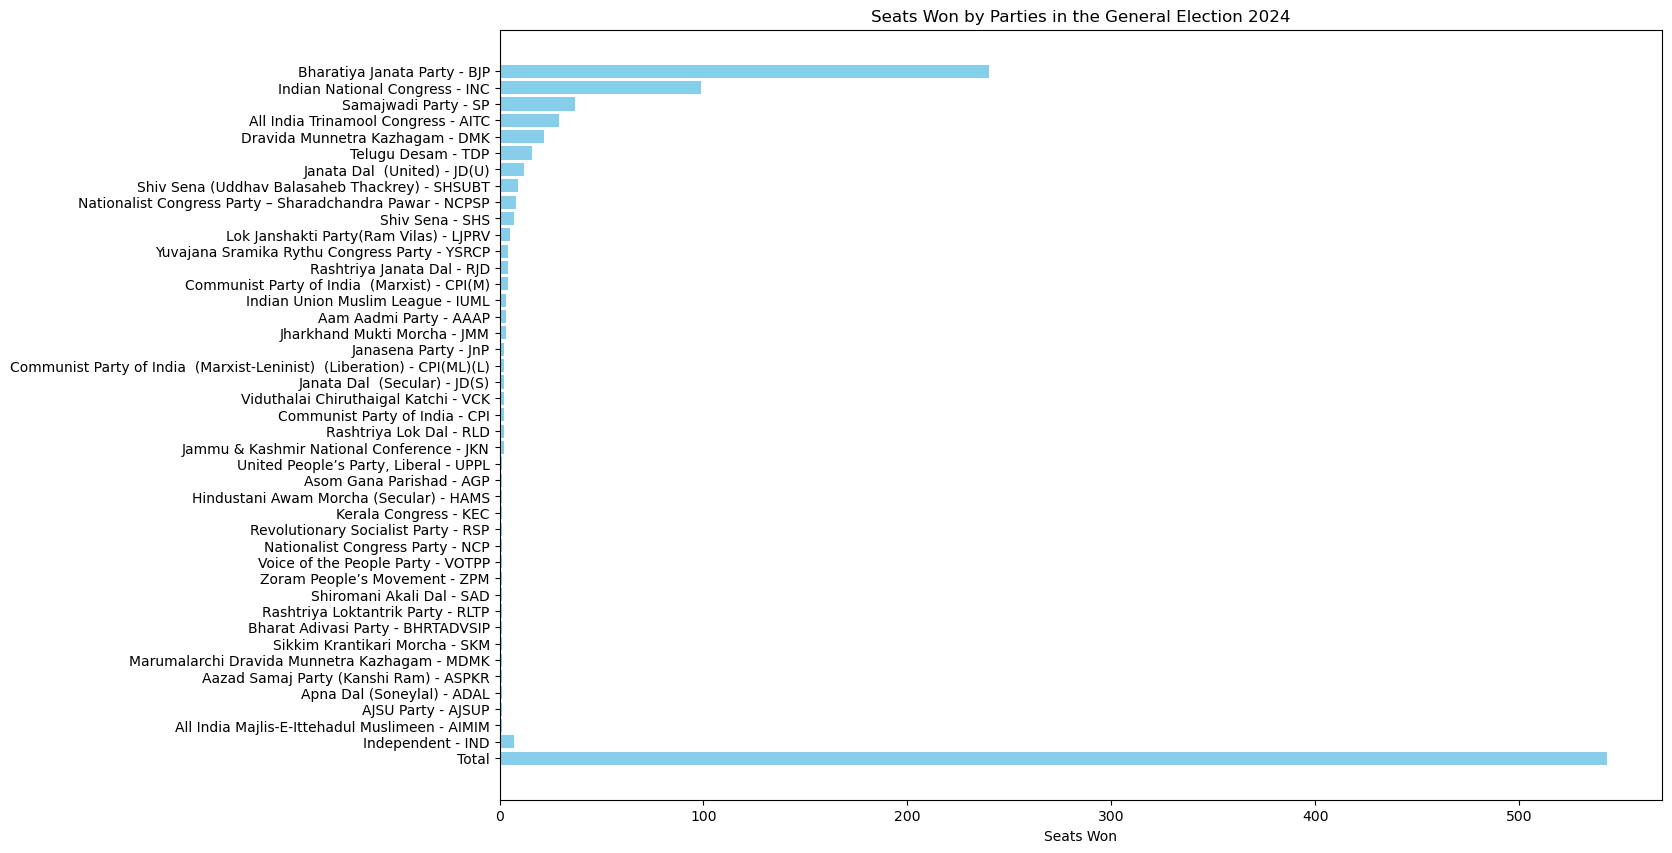

In [28]:
party_data = []
table = soup.find('table', class_='table')
if table:
    rows = table.find_all('tr')

    for row in rows[1:]: 
        cols = row.find_all(['th', 'td'])
        if len(cols) >= 2: 
            party_name = cols[0].text.strip()
            seats_won = int(cols[1].text.strip())
            party_data.append((party_name, seats_won))

    if not party_data:
        print("No data found in the table.")
    else:
        parties = [party[0] for party in party_data]
        seats_won = [party[1] for party in party_data]
        plt.figure(figsize=(15,10))
        plt.barh(parties, seats_won, color='skyblue')
        plt.xlabel('Seats Won')
        plt.title('Seats Won by Parties in the General Election 2024')
        plt.gca().invert_yaxis()  # Invert y-axis to display the party with the highest seats at the top
        plt.show()
else:
    print(f"No table found with class 'table' on {url}.")

In [29]:
footer = soup.find('footer', class_='footer')

In [30]:
if footer:
    # Extracting text from the footer elements
    helpline_text = footer.find('h6', class_='mb-1').text.strip()
    last_updated_text = footer.find('div', class_='sm-text').text.strip()

In [31]:
google_play_link = footer.find('a', href='https://play.google.com/store/apps/details?id=com.eci.citizen')['href']
apple_app_store_link = footer.find('a', href='https://apps.apple.com/in/app/voter-helpline/id1456535004')['href']

In [32]:
print("Helpline Text:", helpline_text)

Helpline Text: Download Voter helpline app to see results on mobile


In [33]:
select_element = soup.find('select', {'id': 'ctl00_ContentPlaceHolder1_Result1_ddlState'})

In [34]:
if select_element:
    # Extract all options within the select element
    options = select_element.find_all('option')

    # Iterate through options and print their values and text
    for option in options:
        value = option.get('value')
        text = option.text.strip()
        if value:
            print(f"Value: {value}, Text: {text}")
else:
    print("Select element not found.")

Value: U01, Text: Andaman & Nicobar Islands
Value: S01, Text: Andhra Pradesh
Value: S02, Text: Arunachal Pradesh
Value: S03, Text: Assam
Value: S04, Text: Bihar
Value: U02, Text: Chandigarh
Value: S26, Text: Chhattisgarh
Value: U03, Text: Dadra & Nagar Haveli and Daman & Diu
Value: S05, Text: Goa
Value: S06, Text: Gujarat
Value: S07, Text: Haryana
Value: S08, Text: Himachal Pradesh
Value: U08, Text: Jammu and Kashmir
Value: S27, Text: Jharkhand
Value: S10, Text: Karnataka
Value: S11, Text: Kerala
Value: U09, Text: Ladakh
Value: U06, Text: Lakshadweep
Value: S12, Text: Madhya Pradesh
Value: S13, Text: Maharashtra
Value: S14, Text: Manipur
Value: S15, Text: Meghalaya
Value: S16, Text: Mizoram
Value: S17, Text: Nagaland
Value: U05, Text: NCT OF Delhi
Value: S18, Text: Odisha
Value: U07, Text: Puducherry
Value: S19, Text: Punjab
Value: S20, Text: Rajasthan
Value: S21, Text: Sikkim
Value: S22, Text: Tamil Nadu
Value: S29, Text: Telangana
Value: S23, Text: Tripura
Value: S24, Text: Uttar Pra

In [35]:
import re

In [36]:
base_url = "https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-{}.htm"

In [37]:
state_codes = ['S01', 'S02','S03','S04','S05','S06','S07','S08','S10','S11','S12','S13','S14','S15','S16','S17','S18','S19','S20','S21','S22','S23','S24','S25','S26','S27','S28','S29','U01','U02','U03','U05','U06','U07','U08','U09']

In [38]:
def scrape_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        # Here you can extract the data you need from the HTML structure
        # Example:
        title = soup.find('title').text.strip()
        total_seats = soup.find('div', class_='page-title').find('h2').text.strip()
        # Example: Scraping party wise results
        party_results = {}
        table = soup.find('table')
        if table:
            rows = table.find_all('tr')
            for row in rows[1:-1]:  # Exclude header and footer rows
                cols = row.find_all('td')
                if len(cols) >= 4:
                    party_name = cols[0].text.strip()
                    seats_won = int(cols[1].text.strip())
                    leading = int(cols[2].text.strip())
                    total = int(cols[3].text.strip())
                    party_results[party_name] = {
                        'seats_won': seats_won,
                        'leading': leading,
                        'total': total
                    }
        return {
            'url': url,
            'title': title,
            'total_seats': total_seats,
            'party_results': party_results
        }
    else:
        print(f"Failed to retrieve data from {url}. Status code: {response.status_code}")
        return None

In [45]:
def get_scraped_data():
    scraped_data = []
    for code in state_codes:
        url = base_url.format(code)
        data = scrape_data(url)
        if data:
            scraped_data.append(data)
    return scraped_data

In [69]:
def visualize_data(data):
    for state_data in data:
        state_name = state_data['total_seats'].split(' (')[0]
        party_results = state_data['party_results']
        
        parties = list(party_results.keys())
        seats_won = [party_results[party]['seats_won'] for party in parties]
        
        plt.figure(figsize=(8, 8))
        
        # Plotting the pie chart
        plt.pie(seats_won, labels=parties, autopct='%1.1f%%', startangle=140)
        
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.title(f'Party-wise Seats Won in {state_name}', fontsize=16)
        
        plt.tight_layout()
        plt.show()

In [70]:
scraped_data = get_scraped_data()

In [71]:
print(scraped_data)

[{'url': 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S01.htm', 'title': 'Election Commission of India', 'total_seats': 'Andhra Pradesh (Total PC - 25)', 'party_results': {'Telugu Desam - TDP': {'seats_won': 16, 'leading': 0, 'total': 16}, 'Yuvajana Sramika Rythu Congress Party - YSRCP': {'seats_won': 4, 'leading': 0, 'total': 4}, 'Bharatiya Janata Party - BJP': {'seats_won': 3, 'leading': 0, 'total': 3}, 'Janasena Party - JnP': {'seats_won': 2, 'leading': 0, 'total': 2}}}, {'url': 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S02.htm', 'title': 'Election Commission of India', 'total_seats': 'Arunachal Pradesh (Total PC - 2)', 'party_results': {'Bharatiya Janata Party - BJP': {'seats_won': 2, 'leading': 0, 'total': 2}}}, {'url': 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S03.htm', 'title': 'Election Commission of India', 'total_seats': 'Assam (Total PC - 14)', 'party_results': {'Bharatiya Janata Party - BJP': {'seats_won': 9, 'l

In [97]:
ieldnames = ["State/UT", "Total Seats", "Party", "Seats Won", "Leading", "Total"]

# Specify the output CSV file name
csv_file = "state_wise.csv"

# Write data to CSV file with UTF-8 encoding
with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    
    # Write header
    writer.writeheader()
    
    # Track processed states to avoid duplicates
    processed_states = set()
    
    # Flatten and write rows from scraped data
    for state_data in scraped_data:
        state_ut = state_data.get('total_seats', '').split('(')[0].strip()  # Extract State/UT from total_seats
        
        # Check if state has already been processed
        if state_ut in processed_states:
            continue
        
        processed_states.add(state_ut)
        
        total_seats = int(state_data.get('total_seats', '').split('-')[-1].replace(')', '').strip())  # Extract Total Seats
        
        # Aggregate party results for the state
        parties_data = []
        for party, results in state_data.get('party_results', {}).items():
            party_name = party.split(' - ')[0].strip()  # Extract Party name
            seats_won = results.get('seats_won', 0)
            leading = results.get('leading', 0)
            total = results.get('total', 0)
            
            parties_data.append({
                "State/UT": state_ut,
                "Total Seats": total_seats,
                "Party": party_name,
                "Seats Won": seats_won,
                "Leading": leading,
                "Total": total
            })
        
        # Write all party results for the state to CSV
        writer.writerows(parties_data)

print(f"CSV file '{csv_file}' has been successfully created with scraped data.")

CSV file 'state_wise.csv' has been successfully created with scraped data.


In [98]:
df=pd.read_csv('state_wise.csv')

In [102]:
df.head(20)

,State/UT,Total Seats,Party,Seats Won,Leading,Total
0,Andhra Pradesh,25,Telugu Desam,16,0,16
1,Andhra Pradesh,25,Yuvajana Sramika Rythu Congress Party,4,0,4
2,Andhra Pradesh,25,Bharatiya Janata Party,3,0,3
3,Andhra Pradesh,25,Janasena Party,2,0,2
4,Arunachal Pradesh,2,Bharatiya Janata Party,2,0,2
5,Assam,14,Bharatiya Janata Party,9,0,9
6,Assam,14,Indian National Congress,3,0,3
7,Assam,14,"United People’s Party, Liberal",1,0,1
8,Assam,14,Asom Gana Parishad,1,0,1
9,Bihar,40,Janata Dal (United),12,0,12


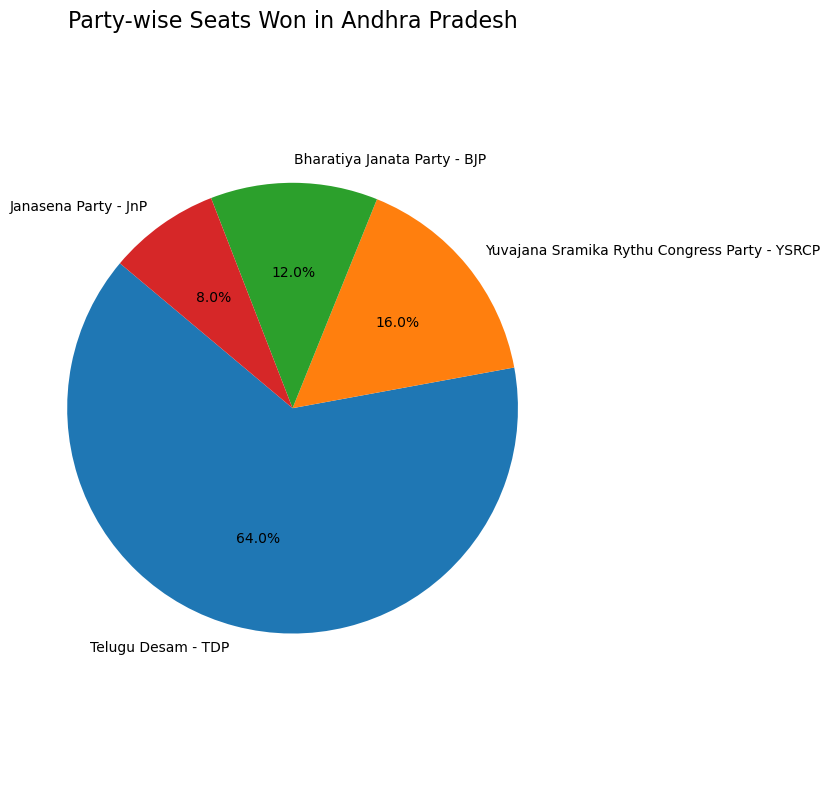

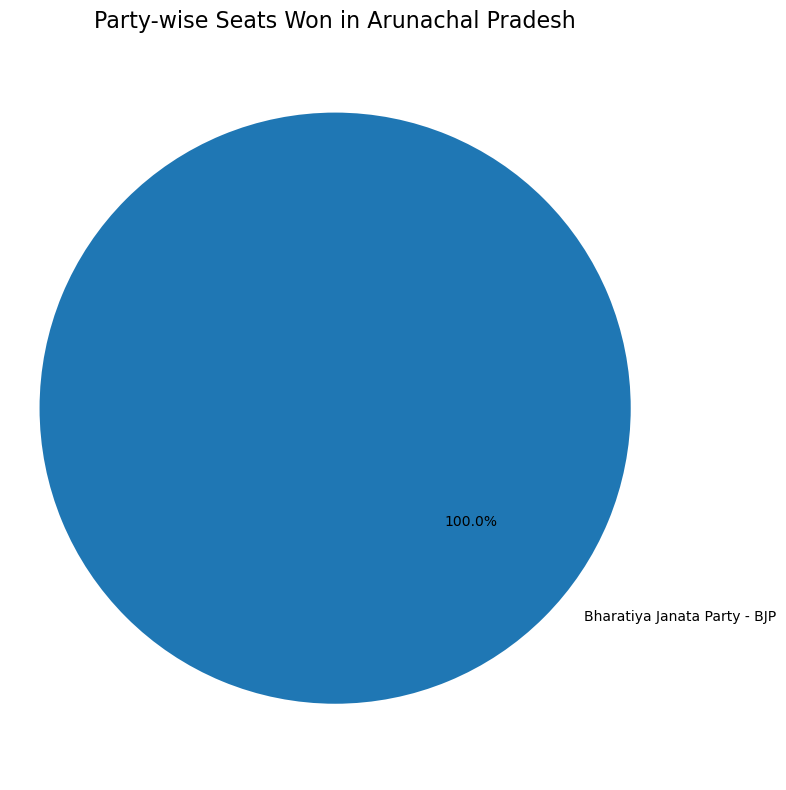

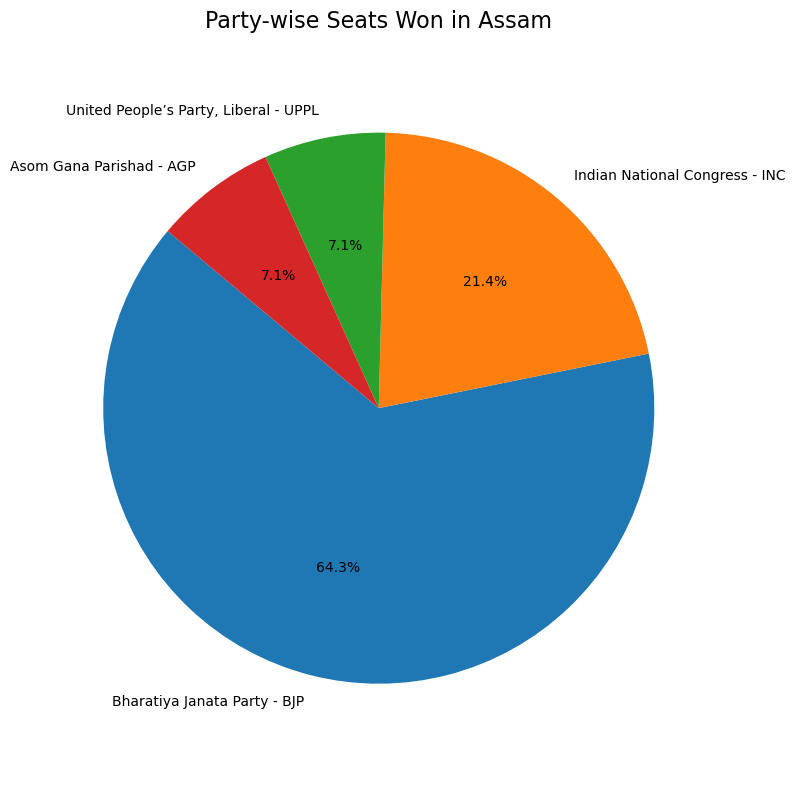

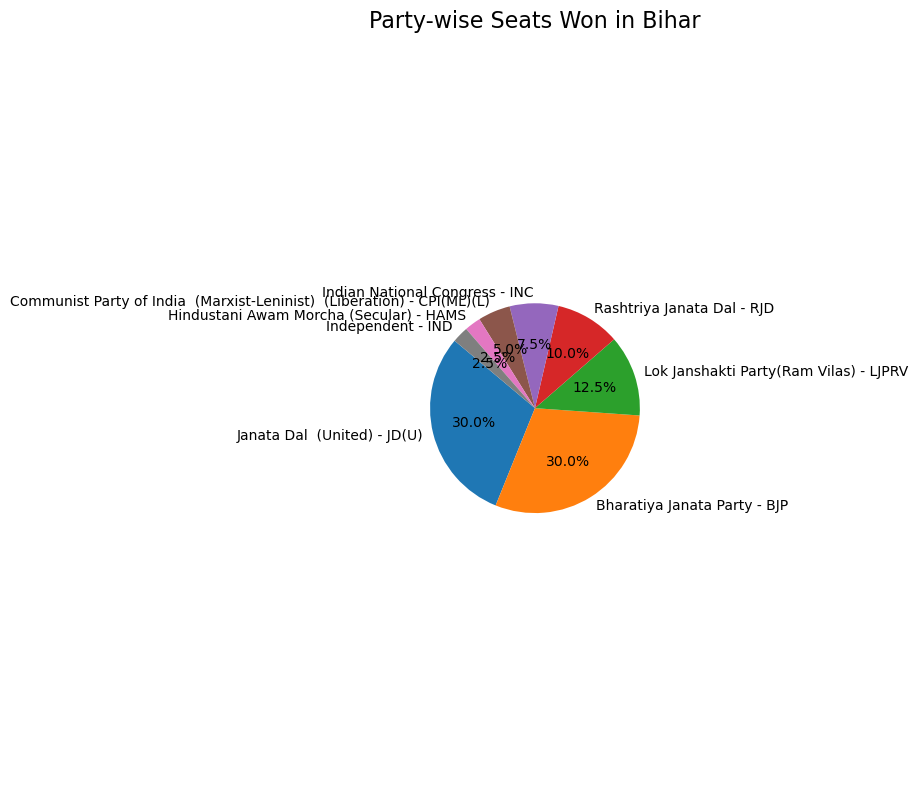

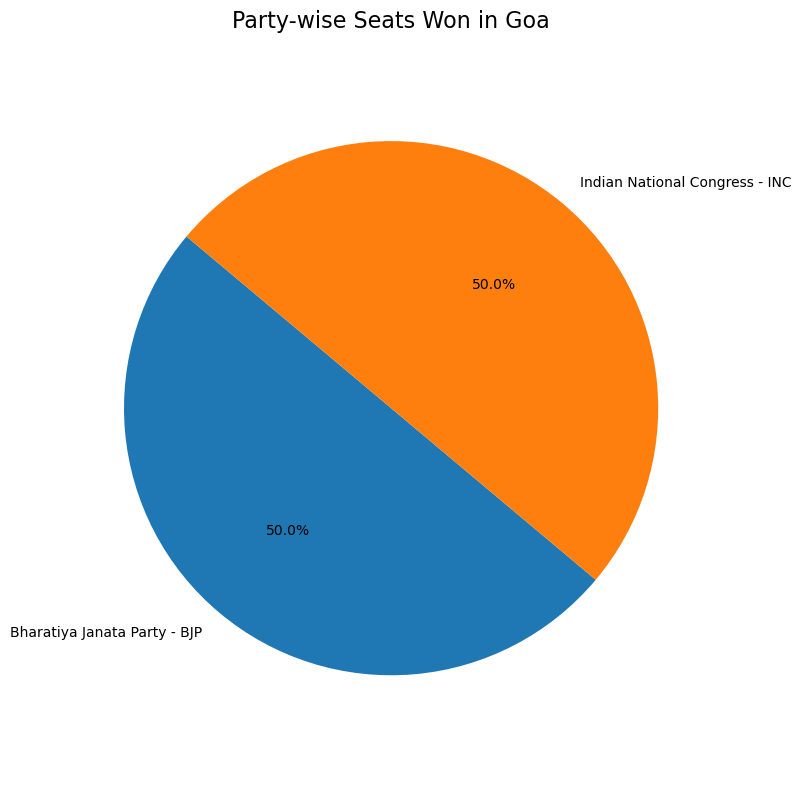

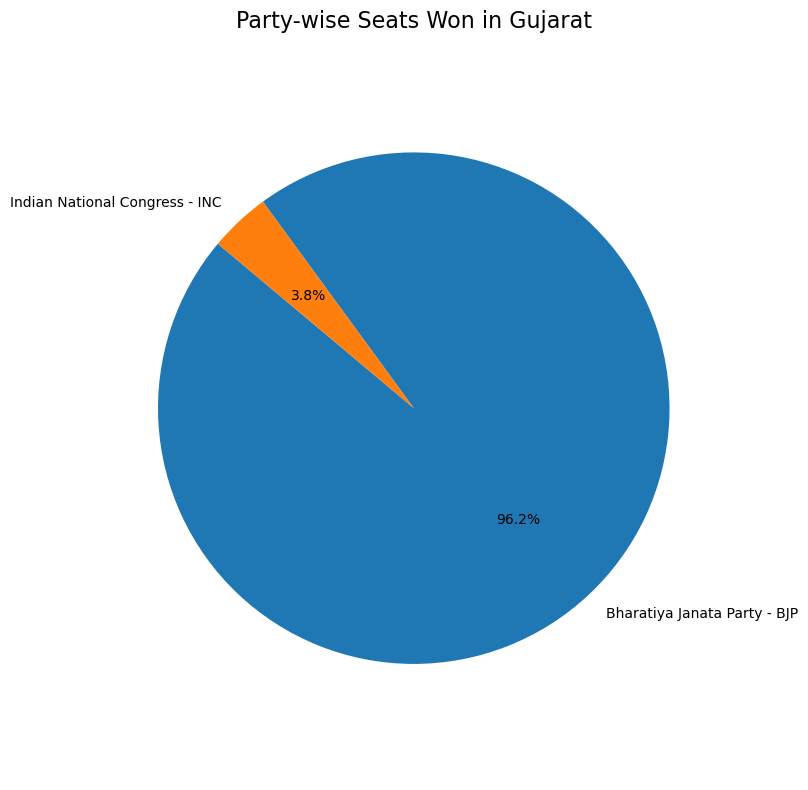

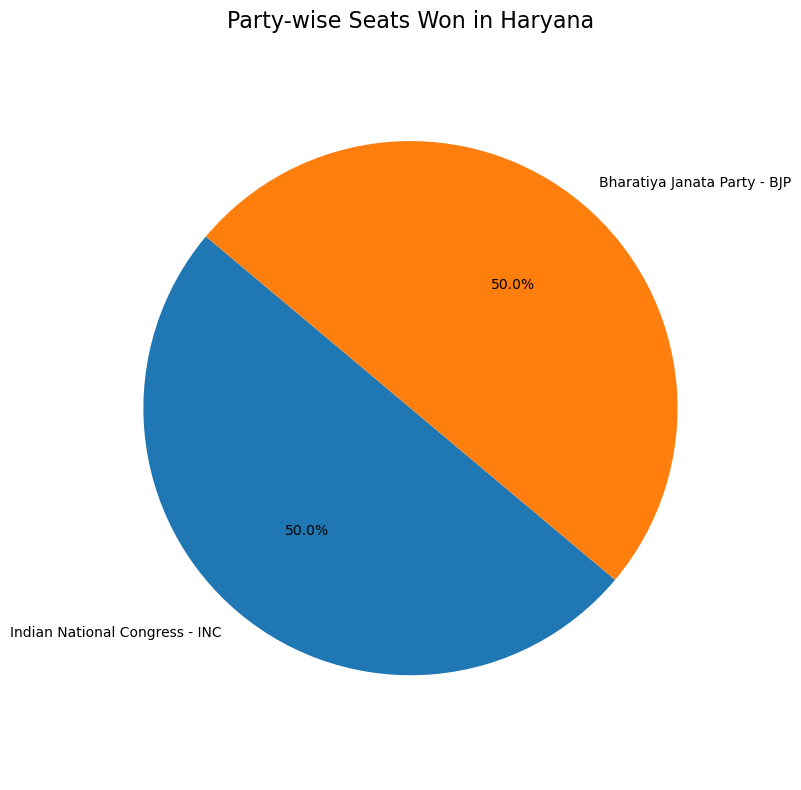

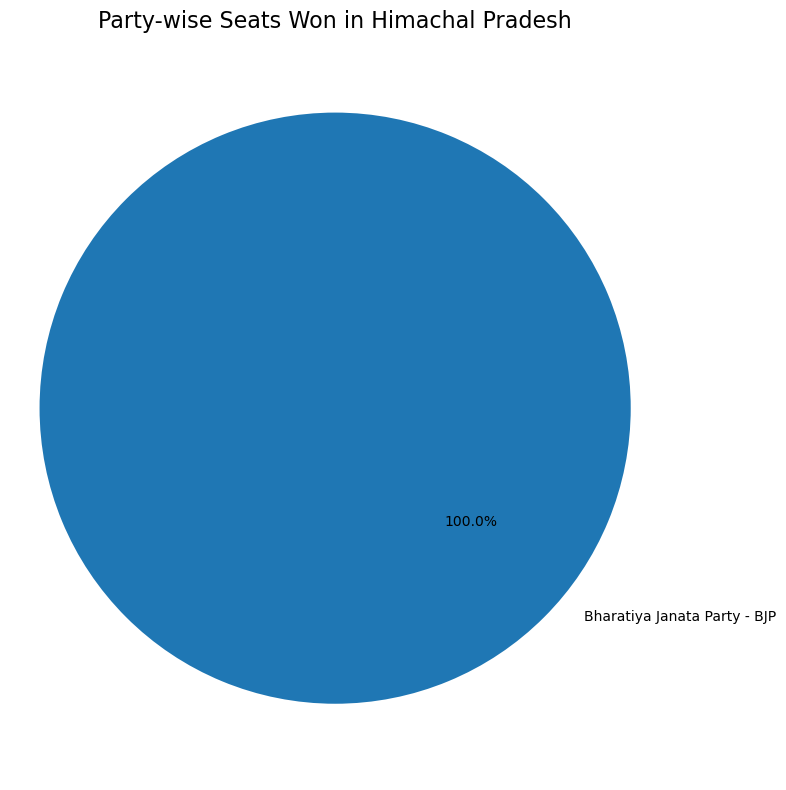

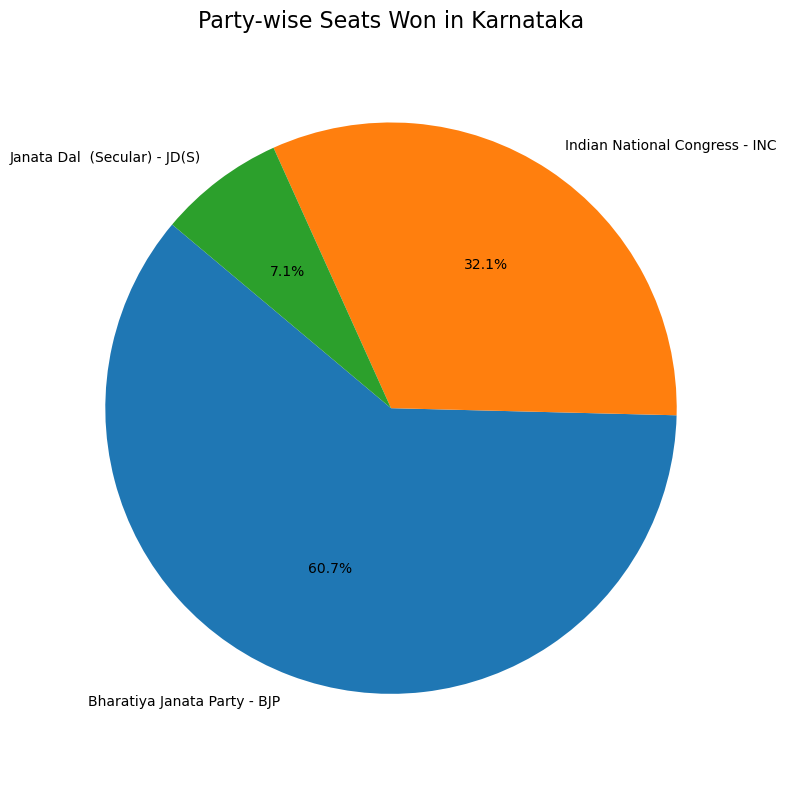

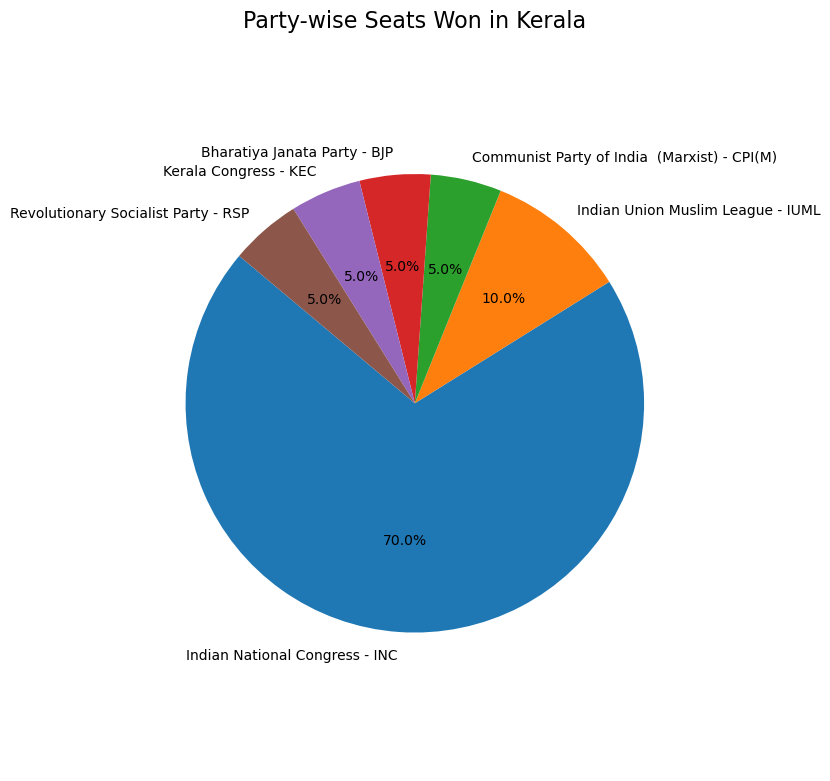

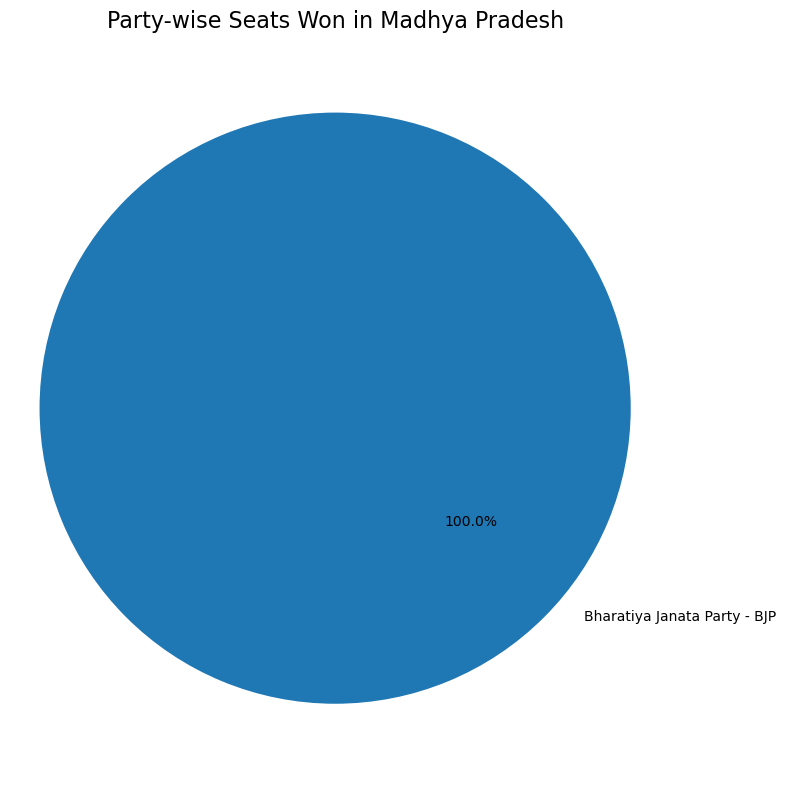

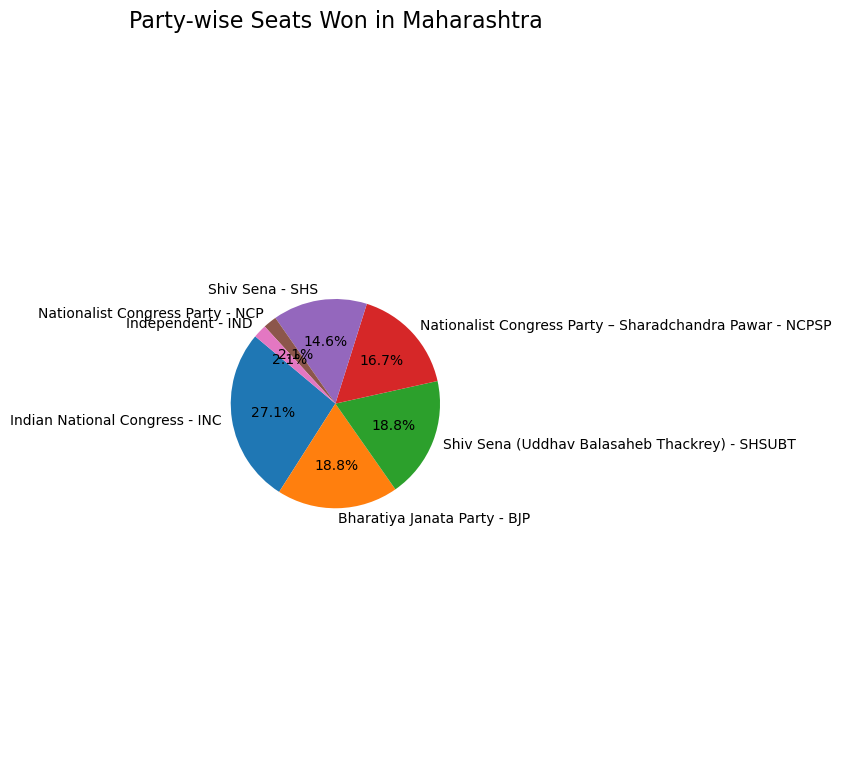

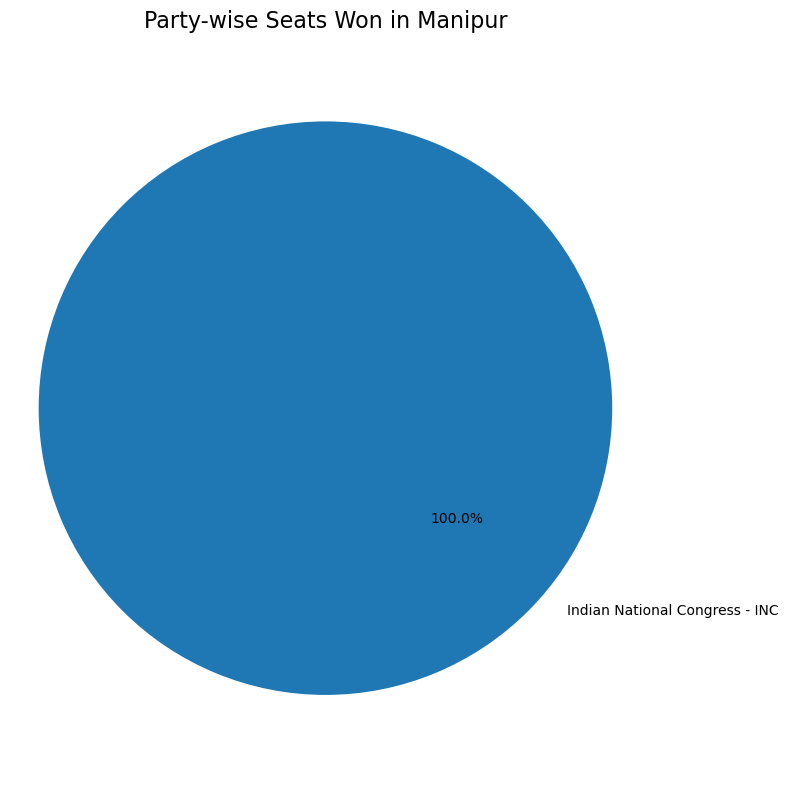

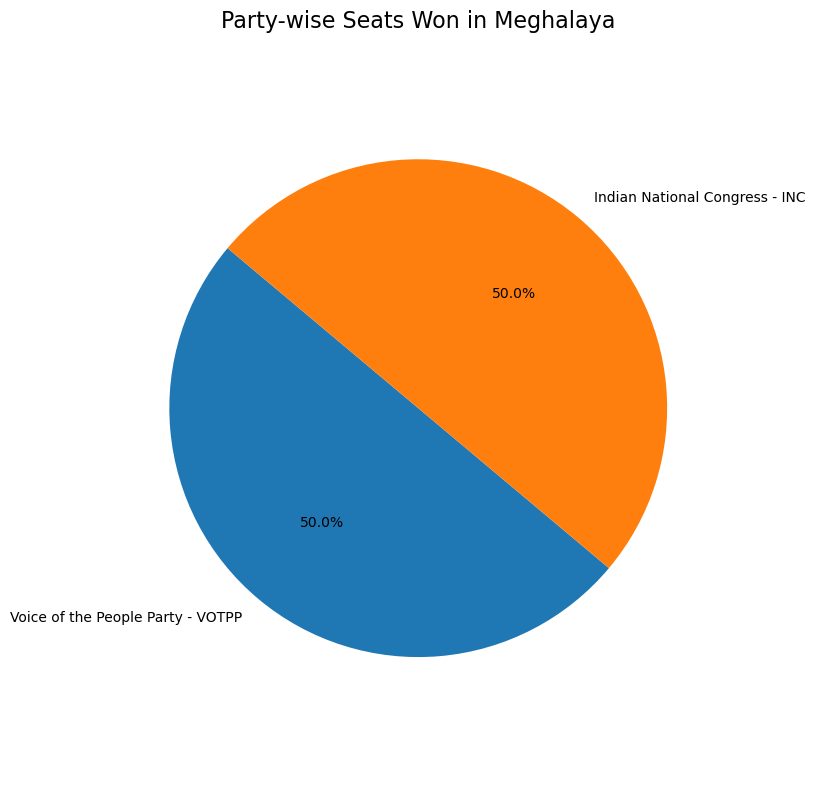

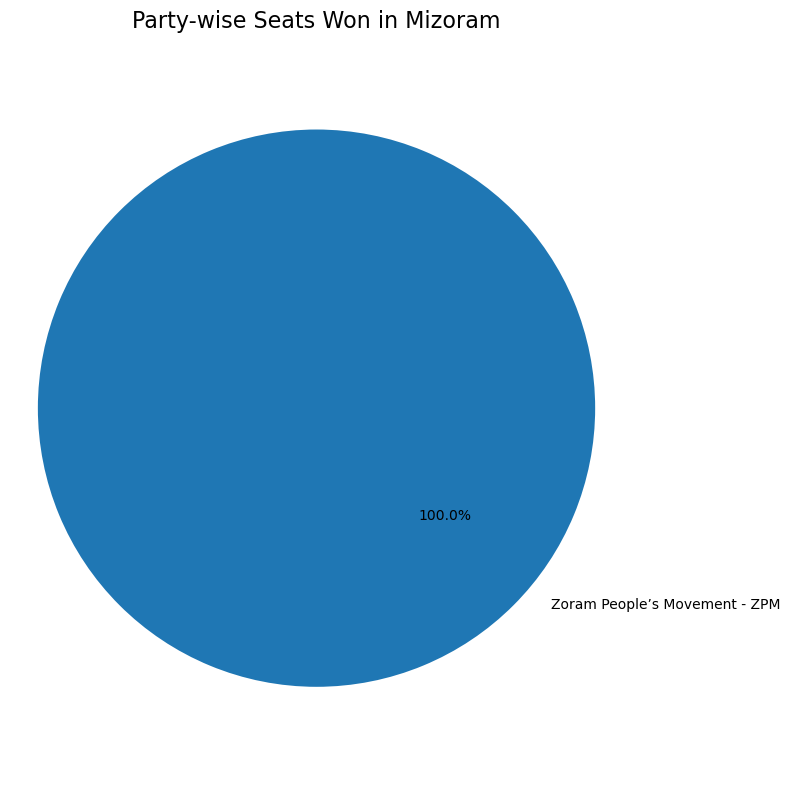

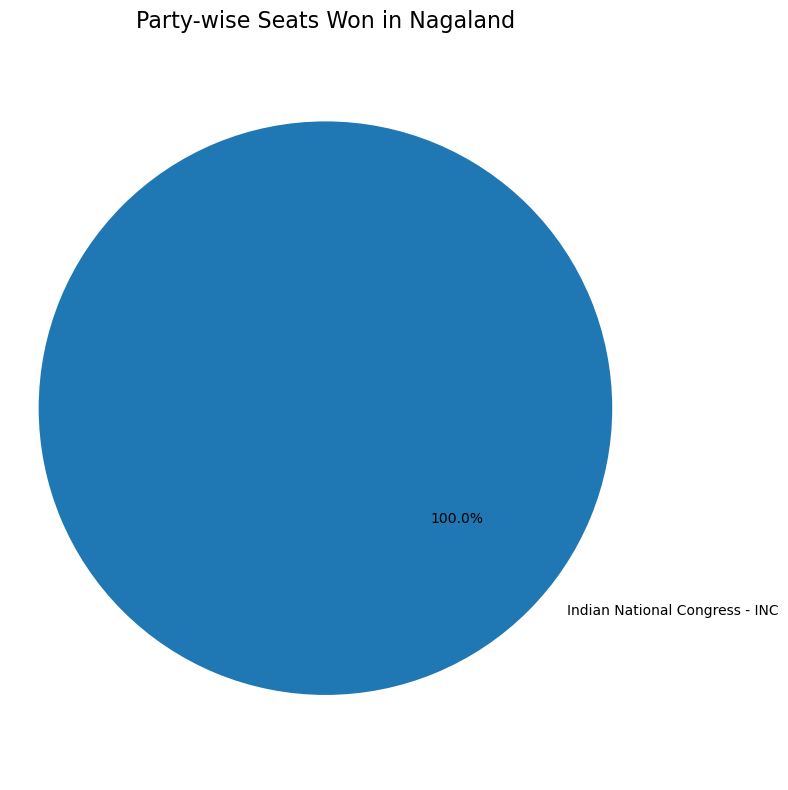

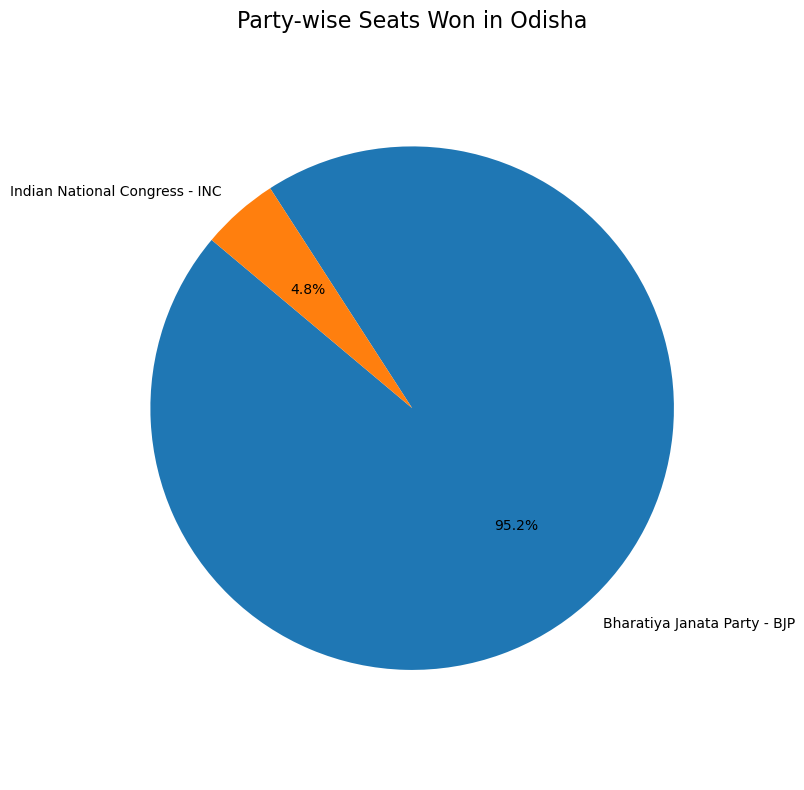

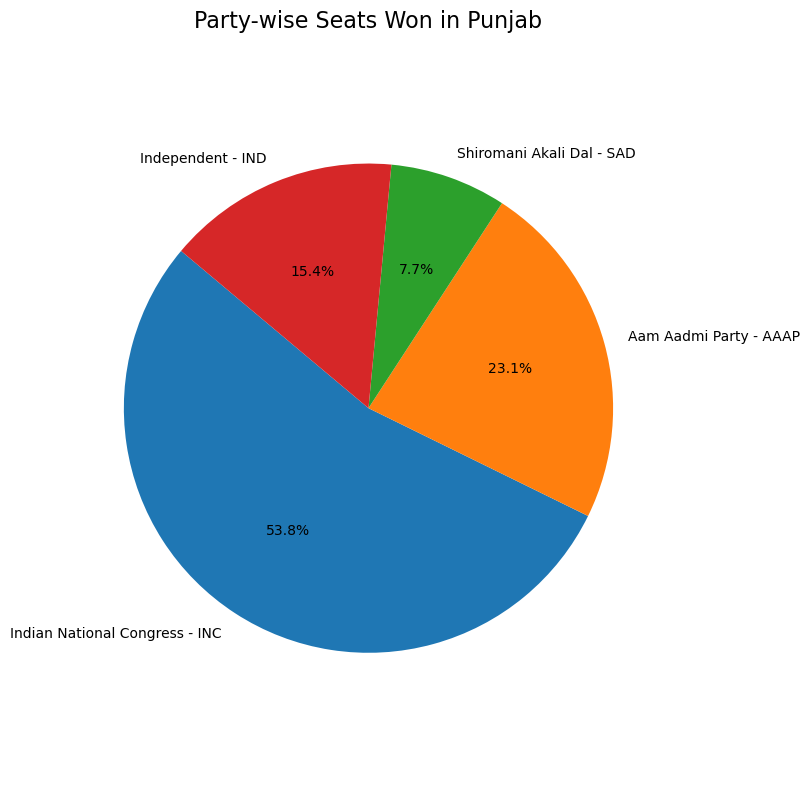

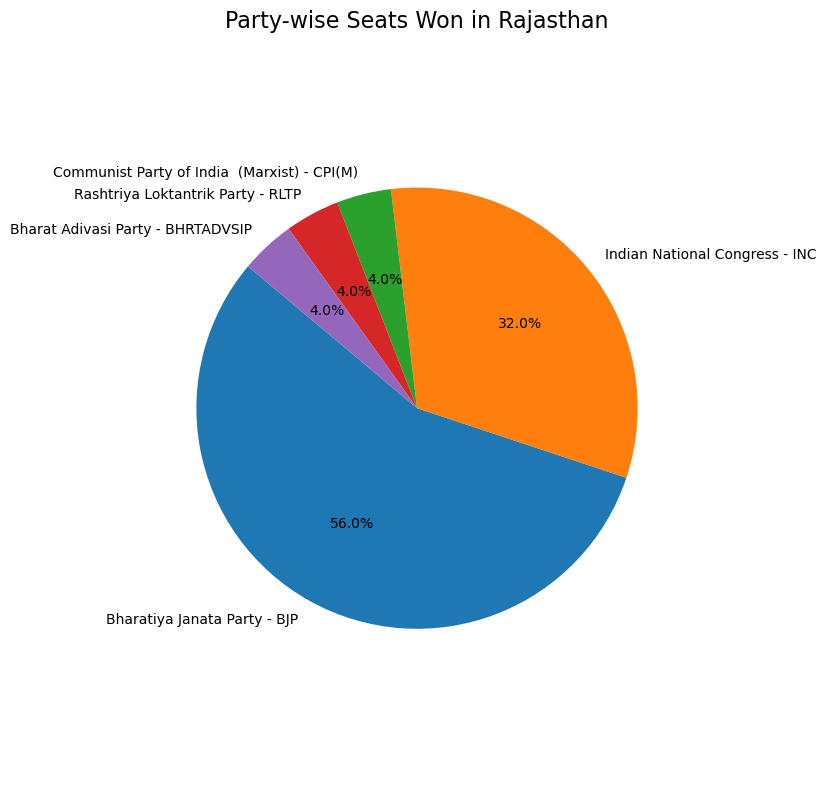

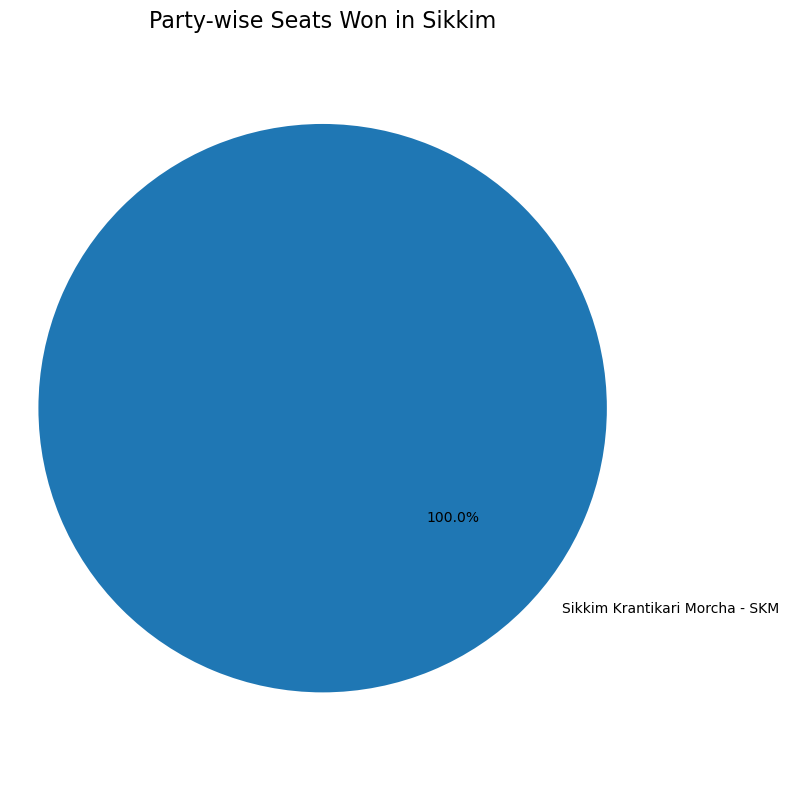

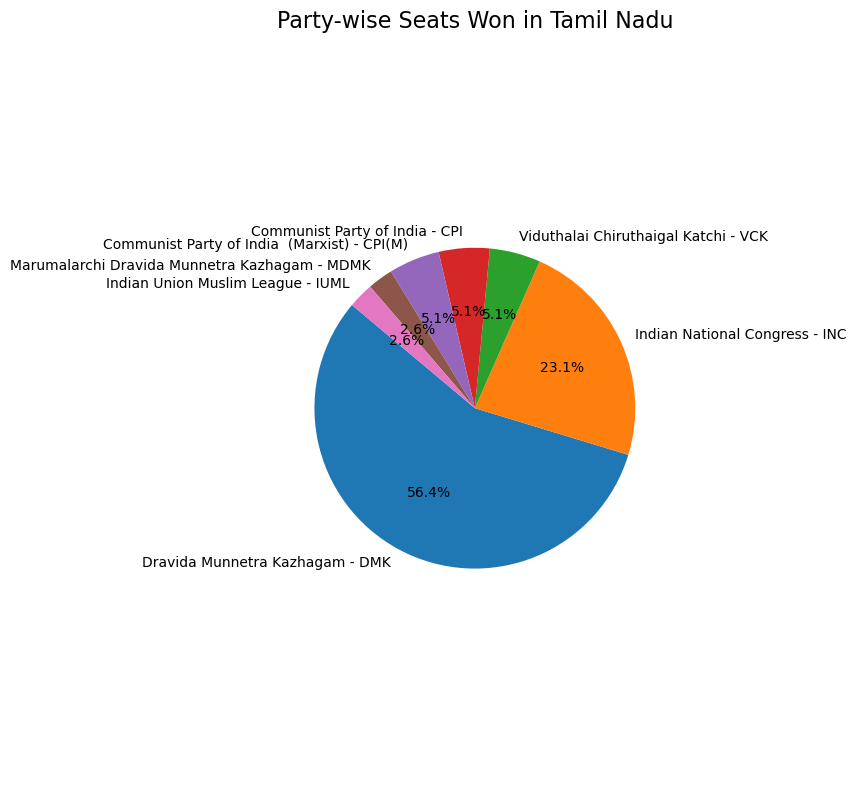

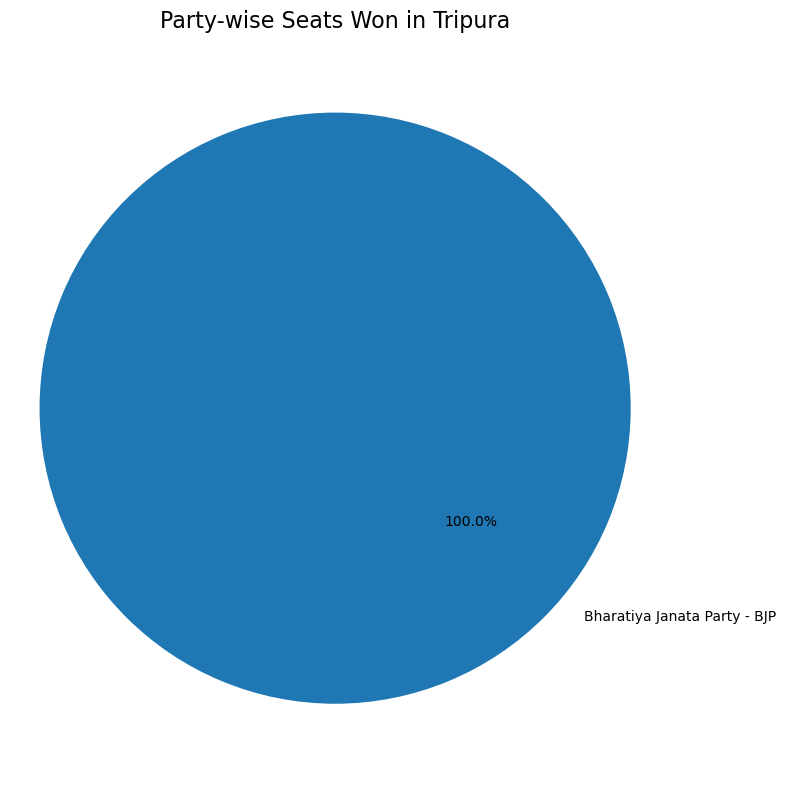

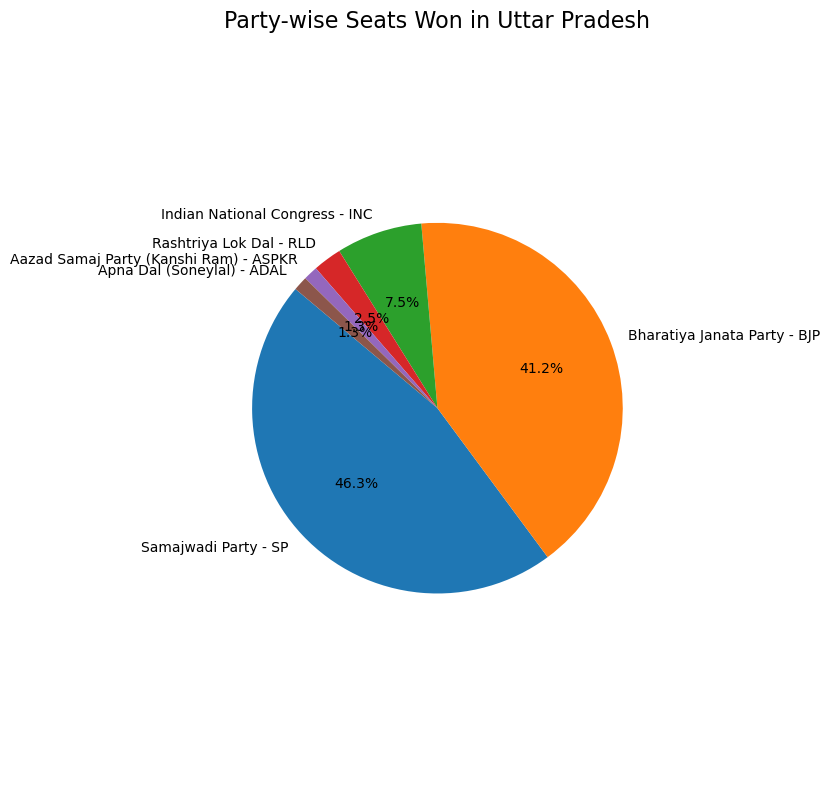

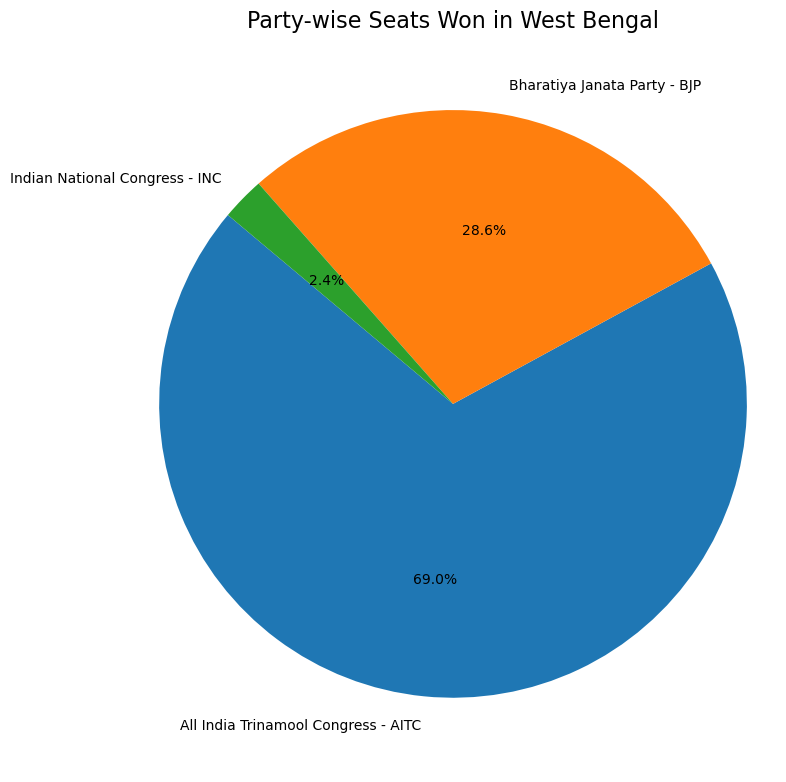

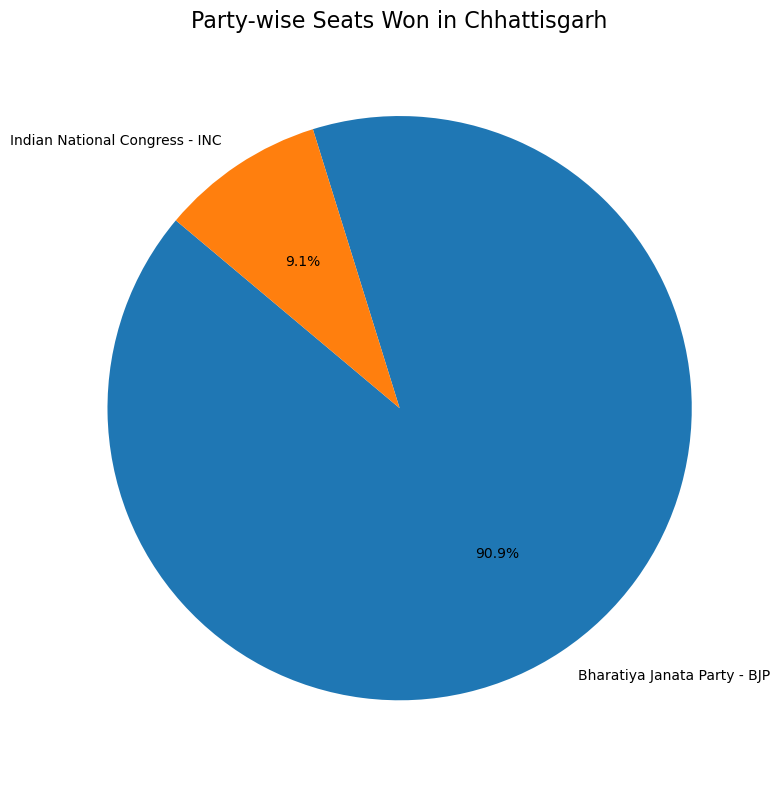

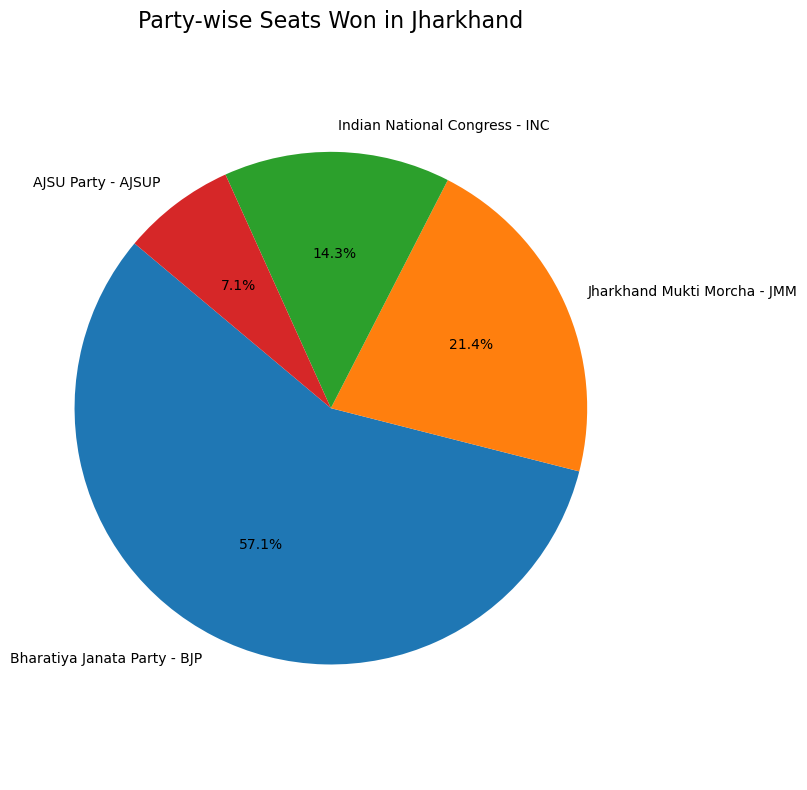

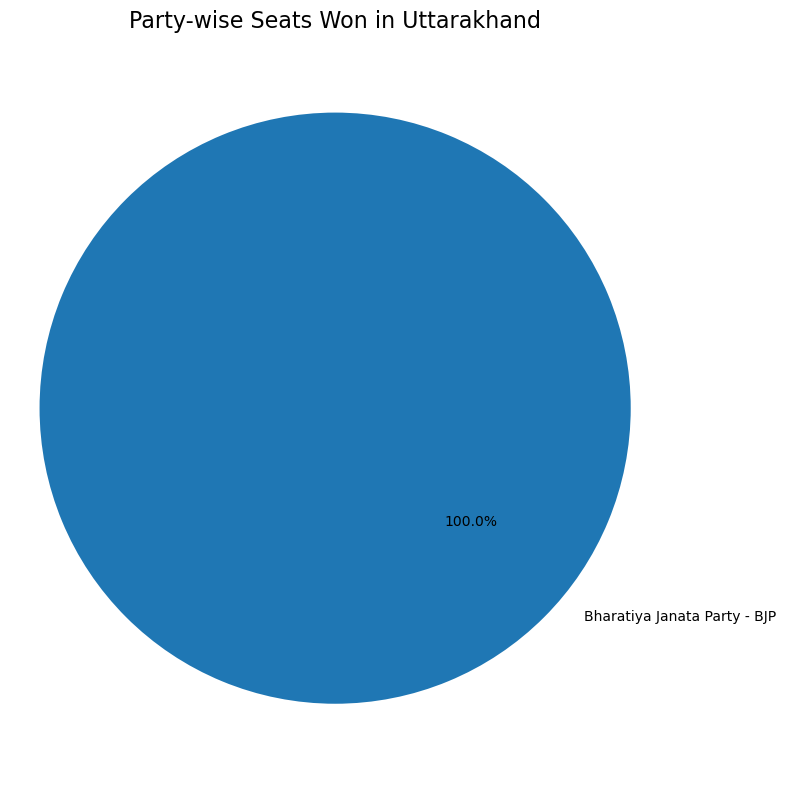

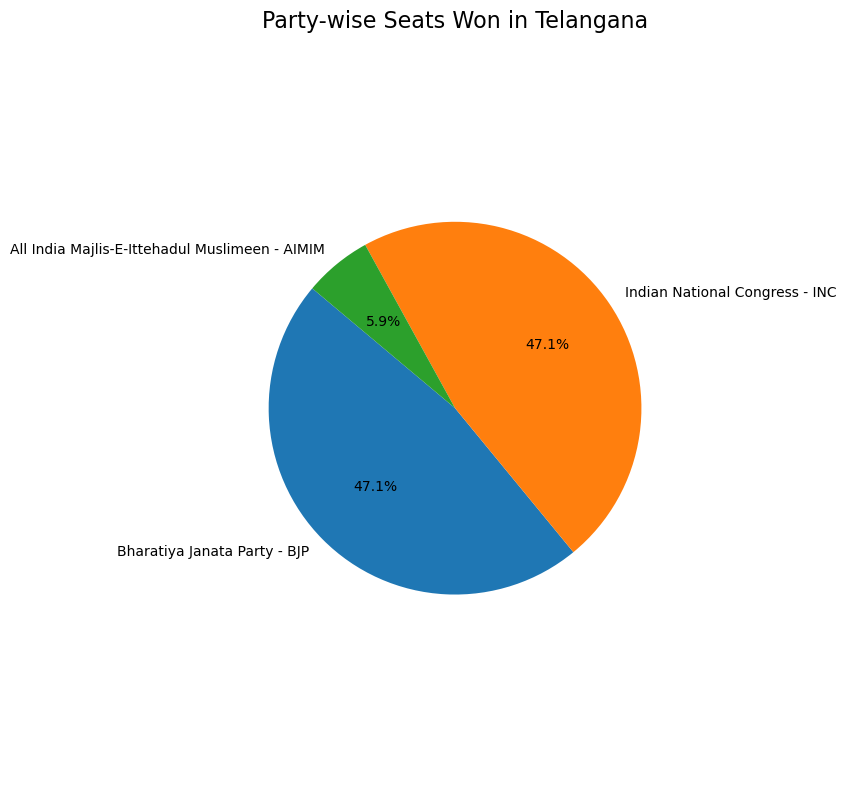

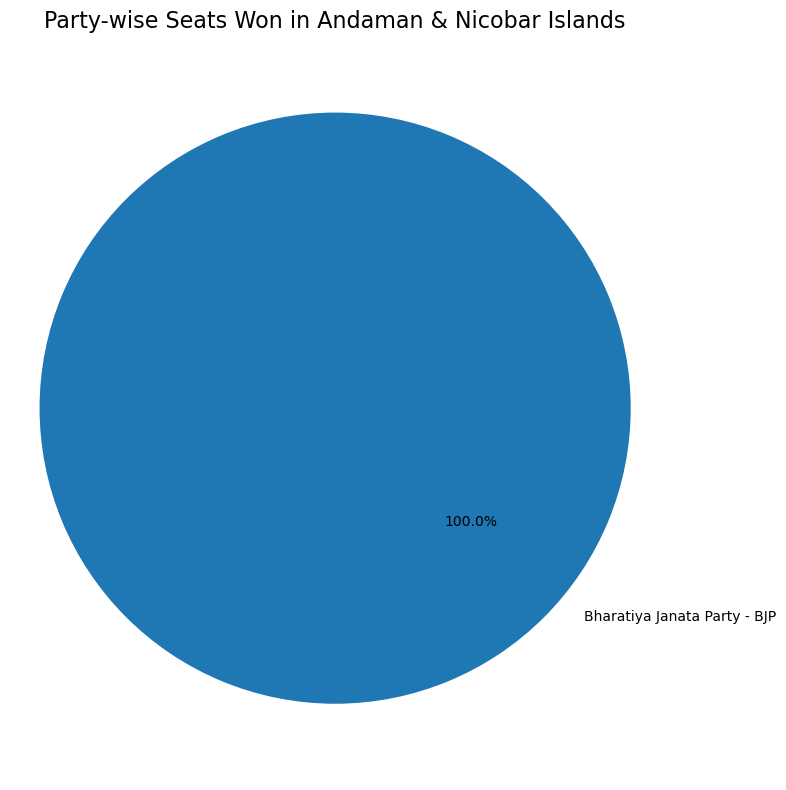

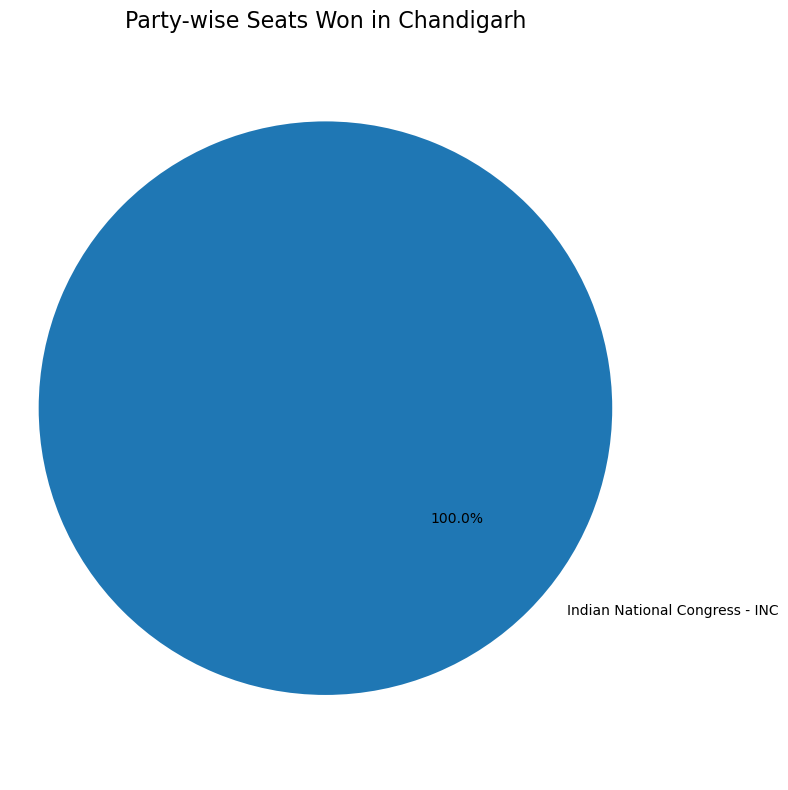

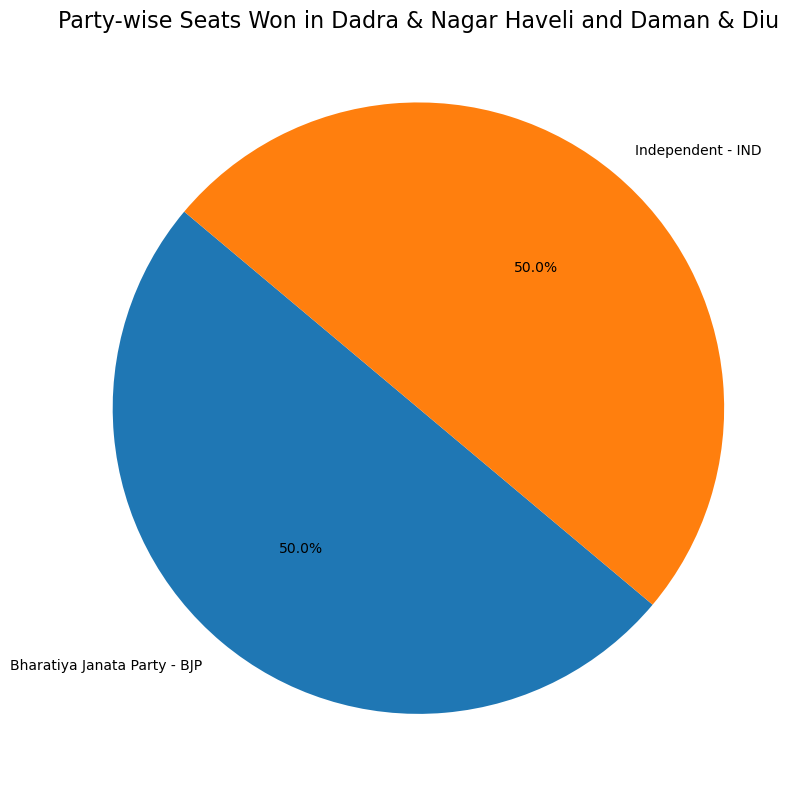

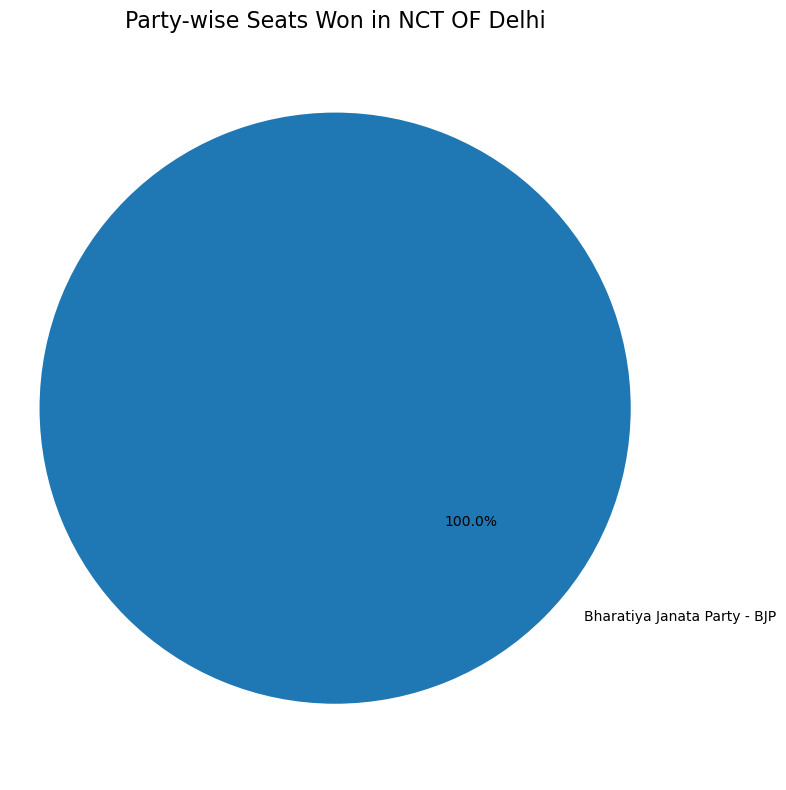

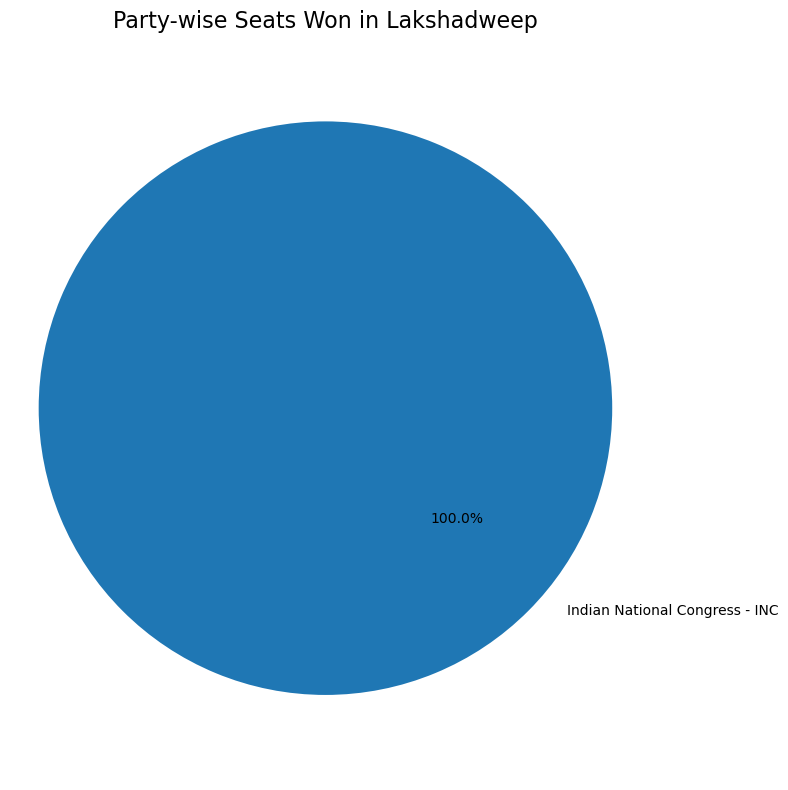

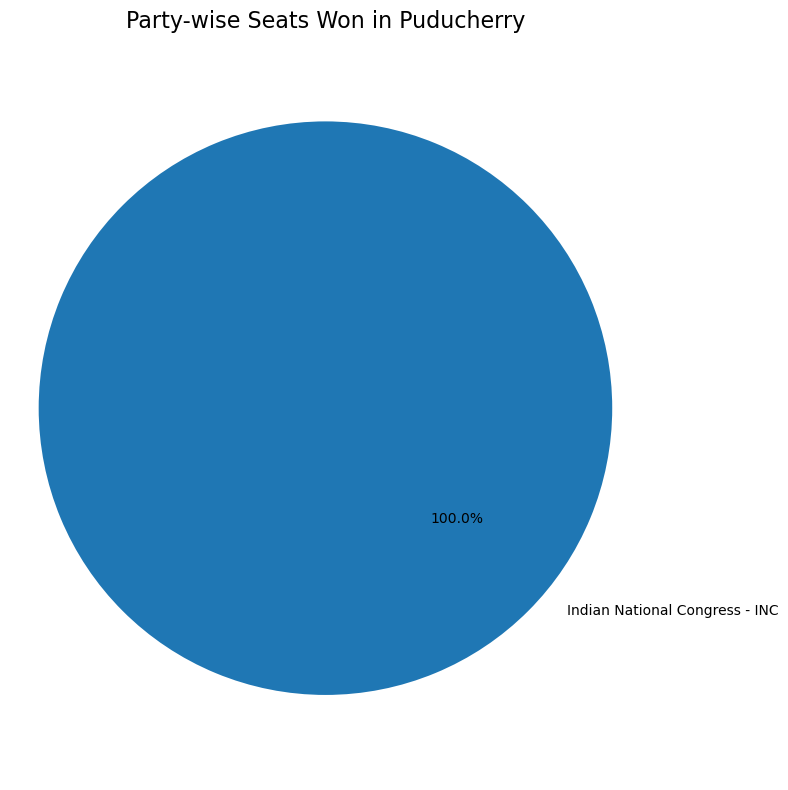

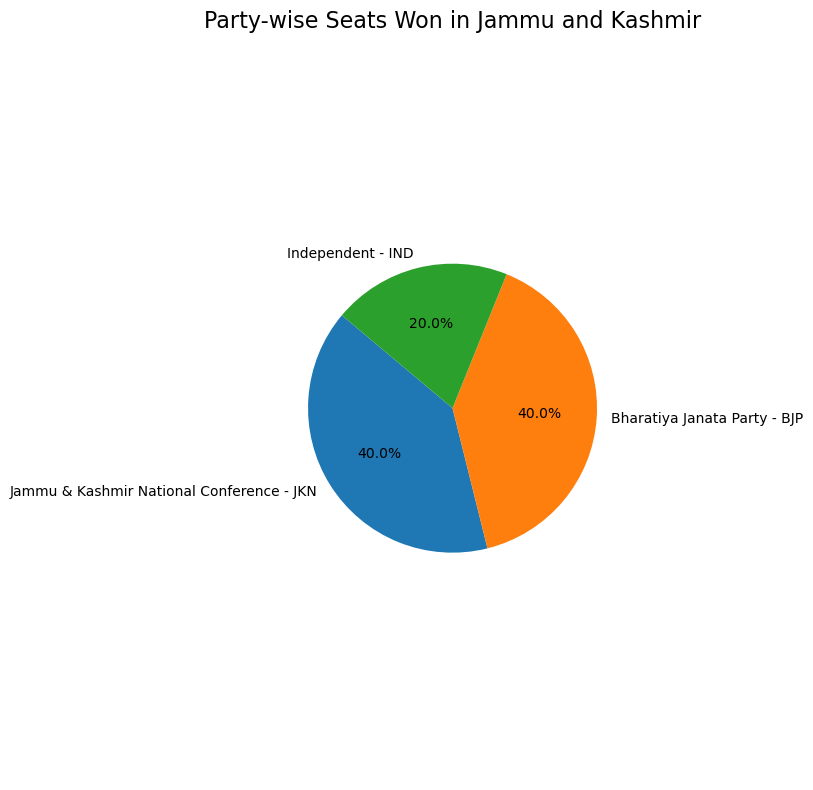

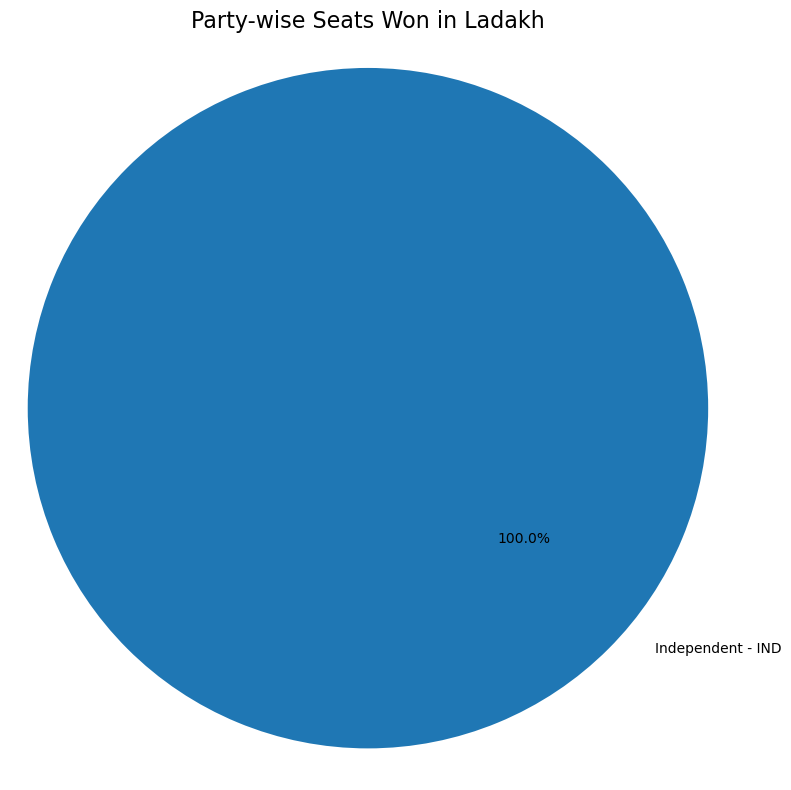

In [72]:
visualize_data(scraped_data)